###**Introduction**
In this mini-project, we will perform data analysis to devise a marketing strategy based on various aspects like area analysis, customer analysis, product category analysis, and sales and profit time series.



###**What You’ll learn**
How to load and preprocess a dataset.
Techniques for area analysis to identify key markets.
Methods for customer analysis to determine high-value customers.
Strategies for product category analysis to identify top-performing products.
How to analyze sales and profit trends over time.
Application of the Pareto Principle to prioritize key drivers of sales and profit.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('US Superstore data.xls')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

- Question 1: Which states have the most sales?


In [27]:
state_names = df['State'].unique()
sales_by_states = df.groupby('State')['Sales'].sum()

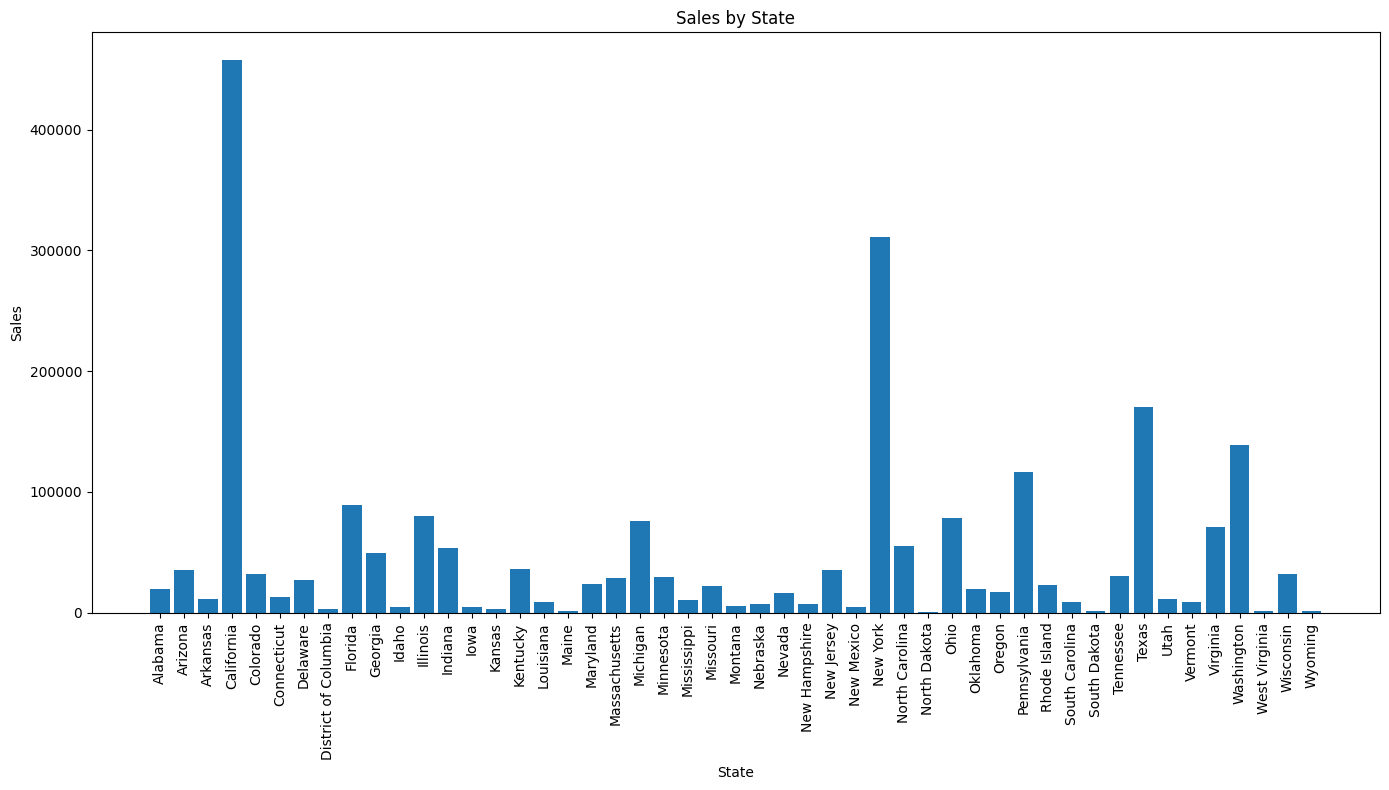

In [38]:
categories = sales_by_states.index
values = sales_by_states.values

plt.figure(figsize=(14, 8))
plt.bar(categories, values)
plt.title('Sales by State')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Answer to question 1: As can be seen from the above bar chart, California has the most sales.

- Qestion 2: What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)


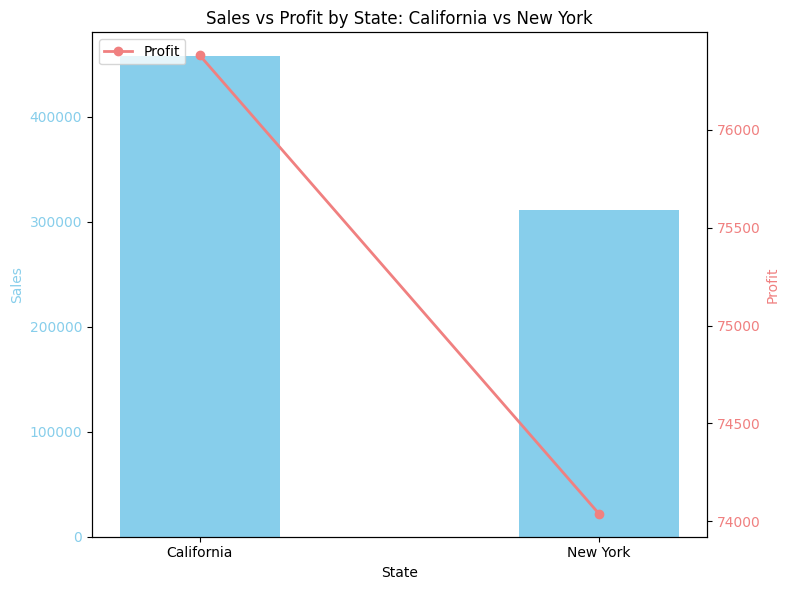

In [47]:
df_filtered = df[df['State'].isin(['New York', 'California'])] # Filter for just New York and California
# de_filtered
state_summary = df_filtered.groupby('State')[['Sales', 'Profit']].sum()
# state_summary
categories = state_summary.index
sales_values = state_summary['Sales'].values
profit_values = state_summary['Profit'].values

x = range(len(categories))  # [0, 1]

fig, ax1 = plt.subplots(figsize=(8, 6))

color = 'skyblue'
ax1.bar(x, sales_values, color=color, width=0.4, label='Sales')
ax1.set_xlabel('State')
ax1.set_ylabel('Sales', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(x)
ax1.set_xticklabels(categories)

ax2 = ax1.twinx()
color = 'lightcoral'
ax2.plot(x, profit_values, color=color, marker = 'o', linewidth=2, label='Profit')
ax2.set_ylabel('Profit', color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.title('Sales vs Profit by State: California vs New York')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**Answer to question 2: **

As can be seen from the chart above: California ourperformed New York in both sales and profit, with the difference in profit much more significant.

- Question 3 Who is an outstanding customer in New York?

In [51]:
#1st criteria: which customer's name in colomn New York show up most times:
#Step 1: how many times a name show up
# ny_df = df[df['State'] == 'New York']
# most_times_customers = ny_df['Customer Name'].value_counts()
# print("Most frequent customer(s) in New York:")
# print(most_times_customers.head(1))  # Top 1

#step 2: only calculate how many times a customers come, meaning, the same name at the same date only counts as one-time visit
ny_df = df[df['State'] == 'New York']
unique_visits = ny_df[['Customer Name', 'Order Date']].drop_duplicates()
most_frequent_customers = unique_visits['Customer Name'].value_counts()
print("Most frequent customer(s) in New York:")
print(most_frequent_customers.head(1))  # Top 1

Most frequent customer(s) in New York:
Customer Name
Greg Tran    4
Name: count, dtype: int64


In [49]:
#How many items the customers bought: multiply items of customer names to see if they bought most items
ny_df = df[df['State'] == 'New York']
quantity_by_customer = ny_df.groupby('Customer Name')['Quantity'].sum()
most_items_customer = quantity_by_customer.sort_values(ascending=False)
print("Top 5 customers in New York by quantity of items bought:")
print(most_items_customer.head(5))

Top 5 customers in New York by quantity of items bought:
Customer Name
Seth Vernon      52
Denny Blanton    43
Ann Chong        41
Peter Fuller     40
Doug Jacobs      39
Name: Quantity, dtype: int64


In [50]:
#How much money they spent?
ny_df = df[df['State'] == 'New York']
customer_stats = ny_df.groupby('Customer Name')[['Quantity', 'Sales']].sum()
top_spenders = customer_stats.sort_values(by='Sales', ascending=False)
print("Top 5 New York customers by total spending:")
print(top_spenders.head())

Top 5 New York customers by total spending:
                  Quantity      Sales
Customer Name                        
Tom Ashbrook            22  13723.498
Peter Fuller            40   7678.228
Seth Vernon             52   7359.918
Tom Boeckenhauer         4   6999.960
Greg Tran               28   6712.744


In [53]:
#Since there are discount, sometimes the shopping doesnt bring profit. who broght most profit?
df_ny = df[df['State'] == 'New York']
profit_by_customer = df_ny.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False)
print("Top 5 New York customers by total profit:")
print(profit_by_customer.head())

Top 5 New York customers by total profit:
Customer Name
Tom Ashbrook        4599.2073
Keith Dawkins       2510.8903
Karen Daniels       2283.0463
Nathan Mautz        2247.1904
Tom Boeckenhauer    2239.9872
Name: Profit, dtype: float64


### **Answer to question 3**
The customer that showed up most times(4 times) is Greg Tran, the customer who bought most items is Seth Vernon, the customer who spent most money is Tom Ashbrook, and the customer who brought the shop most actual profit is also Tom Ashbrook. They are three outstanding customers in differnt ways.

- Question 4: Are there any differences among states in profitability?

State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Name: Profit, dtype: float64
State
North Carolina    -7490.9122
Illinois         -12607.8870
Pennsylvania     -15559.9603
Ohio             -16971.3766
Texas            -25729.3563
Name: Profit, dtype: float64


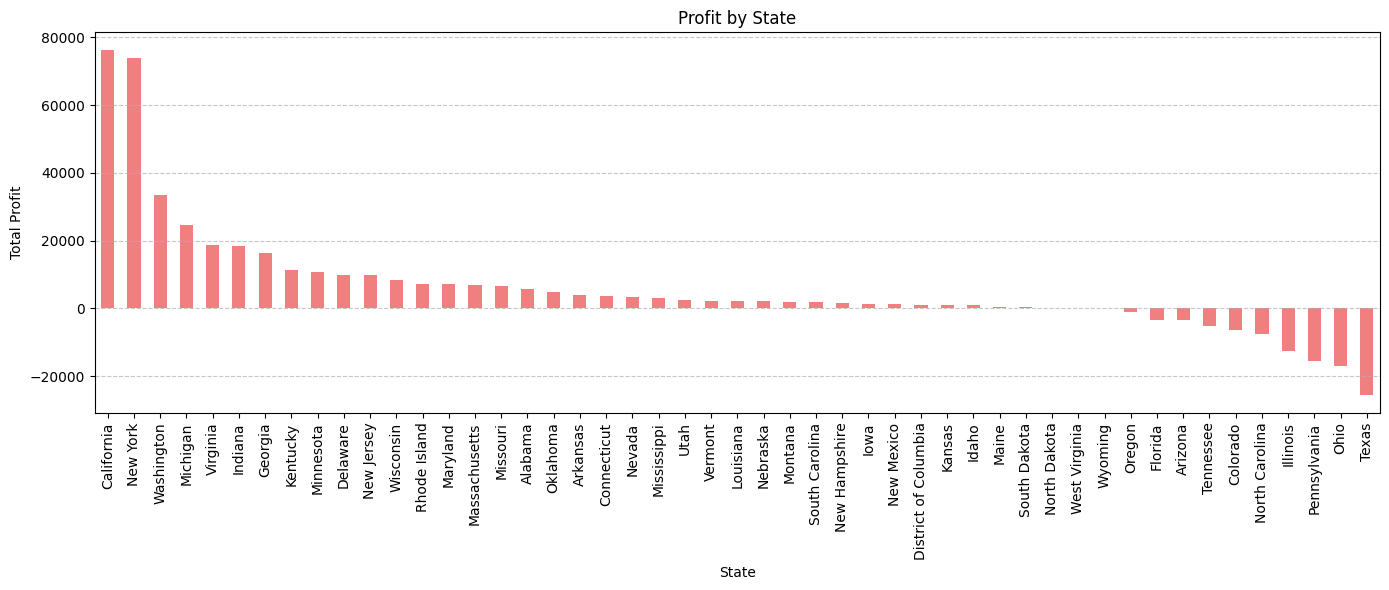

In [56]:
profit_by_state = df.groupby('State')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
profit_by_state.plot(kind='bar', color='lightcoral')

print(profit_by_state.head())
print(profit_by_state.tail())

plt.title('Profit by State')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

- Answer to question 4:
As shown in the bar chart, there are significant differences in profitability among states. For example, California made a profit of $76,381, while Texas had a loss of $25,729.

### **Question 5**
The Pareto Principle, also known as the 80/20 rule, is a concept derived from the work of Italian economist Vilfredo Pareto. It states that roughly 80% of the effects come from 20% of the causes. For instance, identifying the top 20% of products that generate 80% of sales or the top 20% of customers that contribute to 80% of profit can help in prioritizing efforts and resources. This focus can lead to improved efficiency and effectiveness in business strategies. Can we apply Pareto principle to customers and Profit ? (Determine if 20% of the customers contribute to 80% of the profit.)


In [69]:
total_customers = df['Customer Name'].nunique()
print("Total number of customers:", total_customers)
total_profit = df['Profit'].sum()
print("Total profit:", total_profit)

Total number of customers: 793
Total profit: 286397.0216999999


In [71]:
customer_profit = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False)

top_20_count = int(0.2 * total_customers)
top_20_customers = customer_profit.head(top_20_count)

top_20_profit = top_20_customers.sum()

percentage = (top_20_profit / total_profit) * 100

print(f"Top 20% of customers ({top_20_count} customers) generated {top_20_profit:.2f} in profit.")
print(f"That is {percentage:.2f}% of the total profit.")

Top 20% of customers (158 customers) generated 233201.28 in profit.
That is 81.43% of the total profit.


- answer to question 5:

Yes, the Pareto Priniple works here: 20% top customers does contribute to 80% of the total profit

###**Qeustion 6**
What are the Top 20 cities by Sales ? What about the Top 20 cities by Profit ? Are there any difference among cities in profitability ? (Identify the top 20 cities based on total sales and total profit and analyze differences in profitability among these cities.)


In [13]:
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

top_20_count = (city_sales.head(20))
print("Top 20 cities by total sales:")
print(top_20_count)

Top 20 cities by total sales:
City
New York City    256368.1610
Los Angeles      175851.3410
Seattle          119540.7420
San Francisco    112669.0920
Philadelphia     109077.0130
Houston           64504.7604
Chicago           48539.5410
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Detroit           42446.9440
Columbus          38706.2430
Newark            28576.1190
Columbia          25283.3240
Lafayette         25036.2000
Jackson           24963.8580
San Antonio       21843.5280
Burlington        21668.0820
Arlington         20214.5320
Dallas            20131.9322
Name: Sales, dtype: float64


In [9]:
city_profit = df.groupby('City')['Profit'].sum().sort_values(ascending=False)

top_20_count_profit = (city_profit.head(20))
print("Top 20 cities by total profit:")
print(top_20_count_profit)

Top 20 cities by total profit:
City
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
San Francisco    17507.3854
Detroit          13181.7908
Lafayette        10018.3876
Jackson           7581.6828
Atlanta           6993.6629
Minneapolis       6824.5846
San Diego         6377.1960
Springfield       6200.6974
Columbus          5897.1013
Newark            5793.7588
Columbia          5606.1167
Richmond          5567.2486
Providence        5505.6569
Henderson         4911.8609
Arlington         4169.6969
Lakewood          3234.0278
Milwaukee         2793.0851
Name: Profit, dtype: float64


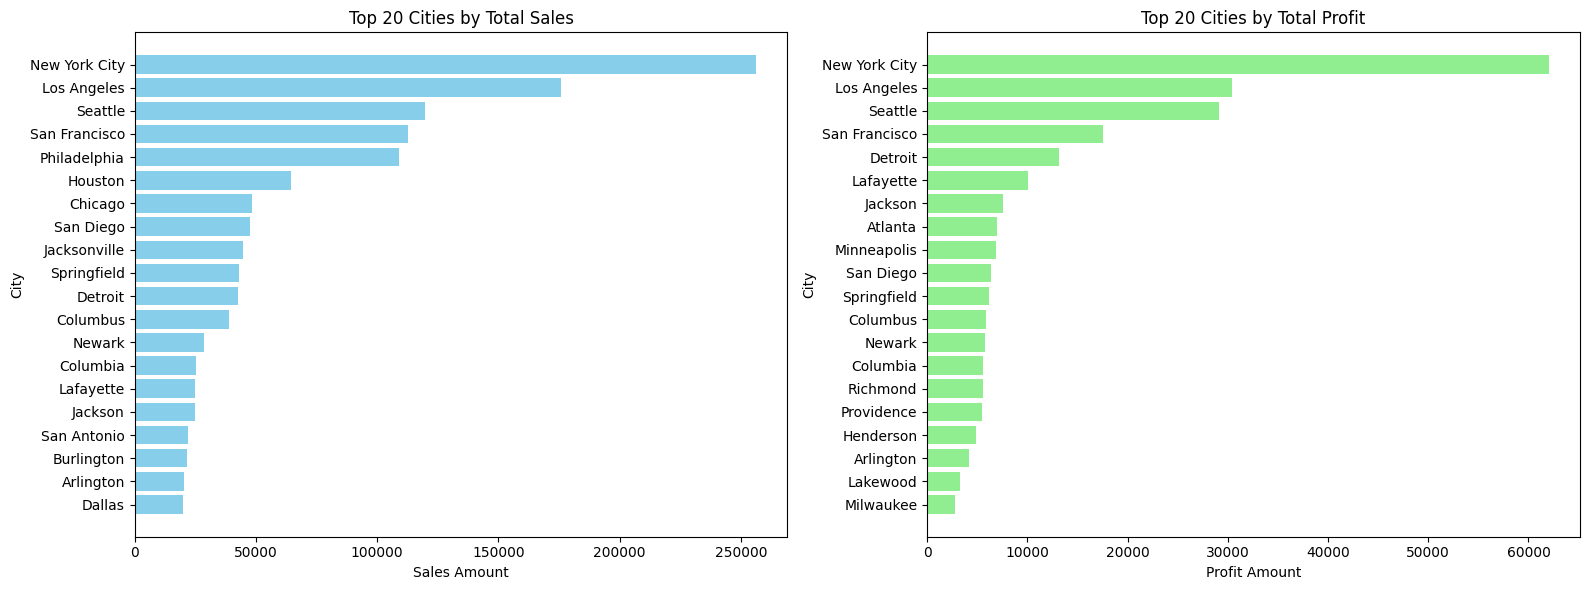

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

# Bar Chart 1: Top 20 Cities by Sales
plt.subplot(1, 2, 1)
plt.barh(top_20_count.index[::-1], top_20_count.values[::-1], color='skyblue')
plt.title('Top 20 Cities by Total Sales')
plt.xlabel('Sales Amount')
plt.ylabel('City')

# Bar Chart 2: Top 20 Cities by Profit
plt.subplot(1, 2, 2)
plt.barh(top_20_count_profit.index[::-1], top_20_count_profit.values[::-1], color='lightgreen')
plt.title('Top 20 Cities by Total Profit')
plt.xlabel('Profit Amount')
plt.ylabel('City')

plt.tight_layout()
plt.show()

In [12]:
city_summary = df.groupby('City')[['Sales', 'Profit']].sum()
city_summary['Profitability'] = city_summary['Profit'] / city_summary['Sales']
print(city_summary)
print(city_summary['Profitability'])

                Sales     Profit  Profitability
City                                           
Aberdeen       25.500     6.6300       0.260000
Abilene         1.392    -3.7584      -2.700000
Akron        2729.986  -186.6356      -0.068365
Albuquerque  2220.160   634.0881       0.285605
Alexandria   5519.570   318.6183       0.057725
...               ...        ...            ...
Woonsocket    195.550    78.6791       0.402348
Yonkers      7657.666  2767.7557       0.361436
York          817.978  -102.1692      -0.124905
Yucaipa        50.800    13.2080       0.260000
Yuma          840.865  -465.9909      -0.554180

[531 rows x 3 columns]
City
Aberdeen       0.260000
Abilene       -2.700000
Akron         -0.068365
Albuquerque    0.285605
Alexandria     0.057725
                 ...   
Woonsocket     0.402348
Yonkers        0.361436
York          -0.124905
Yucaipa        0.260000
Yuma          -0.554180
Name: Profitability, Length: 531, dtype: float64


- Answer to question 6:
As can be seen, the top 20 cities by sales are: 'New York City', 'Los Angeles', 'Seattle', 'San Francisco', 'Philadelphia','Houston', 'Chicago', 'San Diego', 'Jacksonville', 'Springfield', 'Detroit', 'Columbus', 'Newark', 'Columbia', 'Lafayette','Jackson', 'San Antonio', 'Burlington', 'Arlington', 'Dallas'.

The top 20 cities by profits are: 'New York City', 'Los Angeles', 'Seattle', 'San Francisco', 'Detroit', 'Lafayette', 'Jackson', 'Atlanta', 'Minneapolis', 'San Diego', 'Springfield', 'Columbus', 'Newark', 'Columbia', 'Richmond','Providence', 'Henderson', 'Arlington', 'Lakewood', 'Milwaukee'.

And yes, there are differences among cities in profitability. Some cities like New York City, Los Angeles, and Seattle appear in both lists, indicating they are strong in both sales and profit. Others like Philadelphia and Houston are top in sales but not in profit, which could indicate high costs or discounts affecting profitability.

###**Qestion 7**
What are the Top 20 customers by Sales?

In [16]:
sales_by_customer = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)
print("Top 20 customers by total sales:")
print(sales_by_customer.head(20))

Top 20 customers by total sales:
Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Todd Sumrall          11891.751
Greg Tran             11820.120
Becky Martin          11789.630
Seth Vernon           11470.950
Caroline Jumper       11164.974
Clay Ludtke           10880.546
Maria Etezadi         10663.728
Karen Ferguson        10604.266
Bill Shonely          10501.653
Edward Hooks          10310.880
Name: Sales, dtype: float64


###**Question 8 **
Plot the Cumulative curve in Sales by Customers. Can we apply Pareto principle to customers and Sales ?
Answer: As can be seen below, the percentage of total sales from top 20% customers is 47.96%  of total sales, which means that Pareto principle here doesnt apply.

In [19]:
total_customers = df['Customer Name'].nunique()
top_20_count = int(0.2 * total_customers)


customer_sales = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)
total_sales = customer_sales.sum()

top_20_sales = customer_sales.head(top_20_count).sum()

percentage_contribution = (top_20_sales / total_sales) * 100

print(f"Top 20% customers (≈ {top_20_count} customers) generated ${top_20_sales:.2f} in sales.")
print(f"That's {percentage_contribution:.2f}% of total sales.")

Top 20% customers (≈ 158 customers) generated $1101781.39 in sales.
That's 47.96% of total sales.


###**LAST QUESTION**
Based on the analysis, make decisions on which states and cities to prioritize for marketing strategies.

Answer:
High-profit and high-sale states and citites should be prioritized.

California and New York lead both in sales and profit, while Texas, despite having high sales, showed a negative profit. So it is wise to invest more in California and New York, while re-evaluate Texas which has high sale but negative profit, suggesting pricing issues, or excess discounts, which needs to be addressed.

Cities like New York City, Los Angeles, Seattle, San Francisco are consistently strong in both sales and profit. Cities like Detroit and Lafayette have moderate sales but high profit, showing efficient selling. These cities also worth investing more on. On the other hand, some cities like Philadelphia and Houston are high in sales but did not appear in top profit cities. These may need to regulate costs and discounts.



